# [Selected Problems in Machine Learning (NPFL097)](https://ufal.mff.cuni.cz/courses/npfl097)

In [1]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import segmentation
%matplotlib inline
import numpy as np


-22724.57034592831


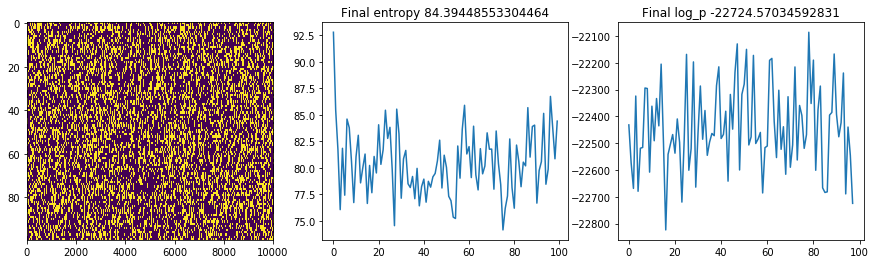

' ora ltern a tive lyaso ppo sing au thor it y i nthecon duct ofhu manr elations propo ne n tsofanar chism kn ow nasanarchistsa dvo cat esta tel e ss s ocie t iesast h eonly m o ral form o fsoci alo rgani za t io nthere a rem any t y pesa n dtr ad itio nso fanar c hismn otal lofw hichar e mu tual ly e x clus i veanarch i sts cho o lsof thoug htc a ndif f erf u nda menta llys u p por tinga nyt hin gf ro mex tremein d i vid ualism toc omplete c o l lecti vis manar c hism isof ten con s ide red tob e a rad i cal l ef twi ngid e ol ogyand m uch ofan a r chistec o n omi csan d anarchis tle ga lph ilo soph yref l e ctan tist a tisti n terp retation so fcomm u nis mc ol l ectivism synd icalismo rpa rt ici p ato rye c ono mic s how ev e ranarch ism hasa lways inclu d e d a n indi v i dual is tstrainsu pport ing ama rk ete co nomy andp r iva tep r oper tyorm or a l lyu nre s train edeg ois mso meindi vidua list a narchist sare a l sosoci a listso r com muni st sw h i les ome anarc hoc ommunis t

In [8]:
data = segmentation.load_data()[:10000]

model = segmentation.Model(alpha = 400, p_c = 0.4)
model.fit(data, num_iter = 200)
model.plot_results()


-2029.164126803297


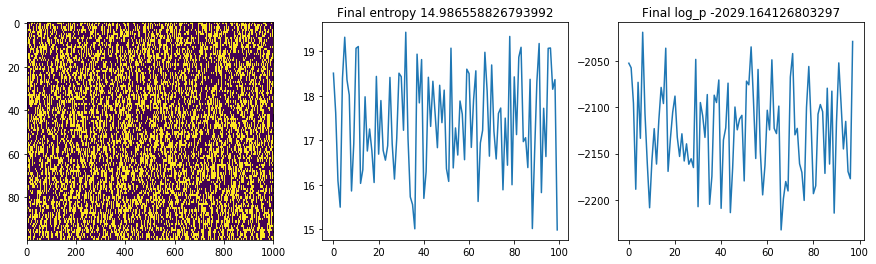

'ora lt e rnative l yasop posi nga u thor i tyi nthecon duc tof hu manr e la tionspropo nentso fa n a rch ismkn ow nas an ar chistsa dvocates tat el ess societi e s as th eo n ly mora l f o rmofs o cia l orga nizat io n thereare manytyp es a ndt r ad ition sof a n archi smno ta llo f whi c h a remu tu a lly e x clus iveanar chist scho ols o fth o u gh tcan d if fer f und am en t all y sup p or ting any t hi ng frome xt r eme in d i vidu a l ismto com ple te collecti vi s m ana rchi smi soft enc o nsid er e d tobe ara di call e f twin gi de o l o g yand m ucho fana r chi ste co nom i csan d anarchis tl egalph il oso ph yr eflect antistat istinter p re tatio nsof c om mun ismc olle c ti vism s yn d icalism o rpa r tici pat o rye cono mic sh o w e v era nar ch is m h asa lway sincl ude da nin d ivi d ua l is tstr ai nsup port ing ama rke tec ono my andprivatepr o pe rt yo rmor ally un r estr a i n ede g o ismsome ind i v id u a li stan a rc his t sarealsos ocial ist sorc omm uni sts wh il

In [5]:
model = segmentation.Model(alpha = 100, p_c = 0.45)
model.fit(data, num_iter = 100)

model.plot_results()